In [1]:
import struct
import numpy as np
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model
from keras import backend as K
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import imageio
import sys
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
import matplotlib.image as mpimg
import cv2
import math
import os
from PIL import Image 

from dehaze import*

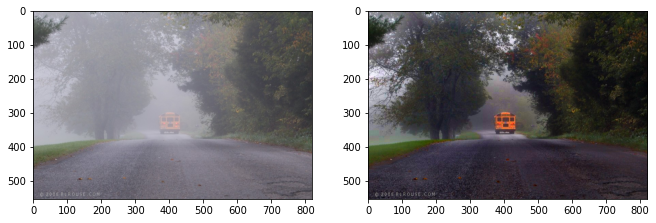

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11 ,8
def fun(img):
#     src = cv2.imread(img);
    src=img
    I = src.astype('float64')/255;

    dark = DarkChannel(I,15);
    A = AtmLight(I,dark);
    te = TransmissionEstimate(I,A,15);
    t = TransmissionRefine(src,te);
    J = Recover(I,t,A,0.1);

    cv2.imwrite("./image/k.png",J*255);
    img2=cv2.imread("./image/k.png");
    return img2
src=cv2.imread("D:\\lane_detection_and vehicle _detection\\hazy_Images\\foggy-school-morning.jpg")
r=fun(src)
r= cv2.cvtColor(r, cv2.COLOR_BGR2RGB)
src= cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
fig,ax=plt.subplots(1,2)
ax[0].imshow(src)
ax[1].imshow(r)

In [3]:
hist_b = cv2.calcHist([r],[0],None,[256],[0,256]) 
hist_g = cv2.calcHist([r],[1],None,[256],[0,256]) 
hist_r = cv2.calcHist([r],[2],None,[256],[0,256]) 

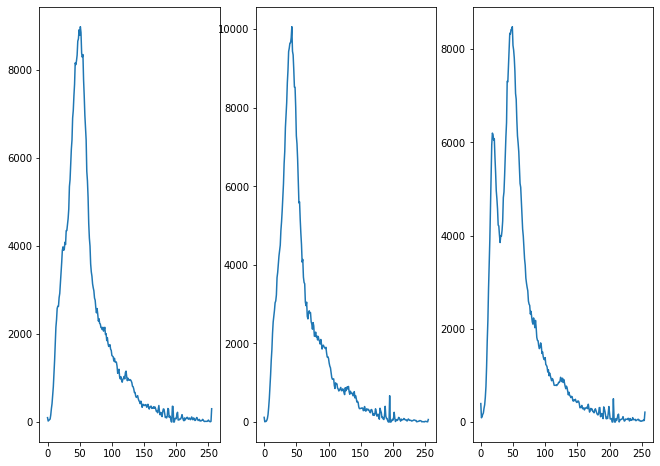

In [4]:
#for dehazed image 
fig1,ax1=plt.subplots(1,3)

ax1[0].plot(hist_b)
ax1[1].plot(hist_g)
ax1[2].plot(hist_r)

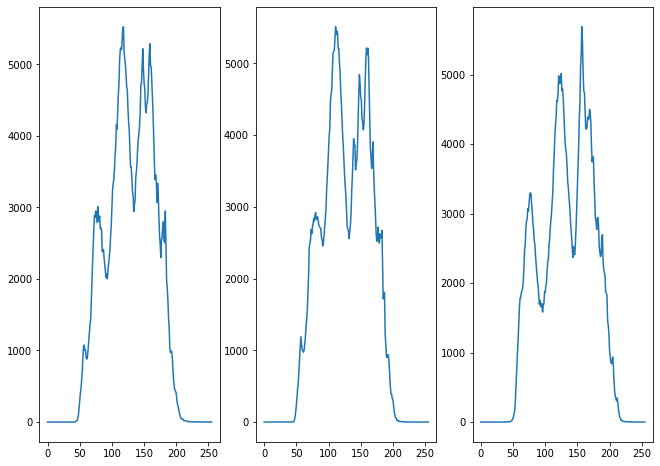

In [5]:
#for original image 
hist_b = cv2.calcHist([src],[0],None,[256],[0,256]) 
hist_g = cv2.calcHist([src],[1],None,[256],[0,256]) 
hist_r = cv2.calcHist([src],[2],None,[256],[0,256]) 
fig1,ax1=plt.subplots(1,3)

ax1[0].plot(hist_b)
ax1[1].plot(hist_g)
ax1[2].plot(hist_r)